<a href="https://colab.research.google.com/github/anna-lyn-williams/neu502b-2025/blob/master/website/content/502B/Computation/Dynamics%20in%20Perception/notebooks/1%20Hebbian%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 Hebbian Learning

## Introduction

### The Ubiquity of Associations

How do you learn to associate things that occur together?

- Peaches and ____________?
- Cause and ____________?
- Law and ____________?
- Sooner or ____________?
- Jack and ____________ went up ______ ____________ ?





Solution{solution}

- Peaches and cream
- Cause and effect
- Law and order
- Sooner or later
- Jack and Jill went up the hill


You can automatically fill in most or all of the blanks using associations you have learned in the past. Associations are everywhere in cognition. You learn to associate all the different properties of individual objects, all the objects that make up familiar scenes, and generally any groups of people, properties, and/or things that tend to co-occur.

When you simply look at your laptop, you know about its weight, texture, range of likely temperatures, approximately how long the battery will operate before dying, and lots of other associated details. When you see only the top of a chair on the other side of a solid table, you automatically infer details about the rest of the chair that is out of sight - the top part of the chair that you see is strongly associated with the rest of a representation of a chair.

What do you expect to see in the waiting room of a doctor's office? As each detail comes to mind, it triggers associations with other details: chairs to sit in while you wait -> coffee table -> magazines -> Oprah magazine, Sports Illustrated, The Economist -> cheap art on walls -> laminate flooring -> hand sanitizer -> clipboards with forms ->, etc.
When you see lightning, what do you expect to hear? Associations can build up in *temporal proximity* (events occurring together in time, like lightning and thunder) and *spatial proximity* (objects that co-occur in space, like a chair and a table). Your stream of consciousness is partly built out of strong and weak associations.

How does the brain learn associations in the first place?


### A Theory of Learning

Perhaps the most influential early theory in neuroscience is about learning associations, summarized as: "Neurons that fire together, wire together." The theory was advanced in great detail by Donald Hebb in 1949, who stated, "The general idea is an old one, that any two cells or systems of cells that are repeatedly active at the same time will tend to become 'associated,' so that activity in one facilitates activity in the other," and it is now called Hebbian Learning. It is an elegant theory because it is simple and can potentially explain many psychological and neuroscientific data. And it is also a mechanistic theory that we can explore by building models.

### Unsupervised Learning

Hebbian learning is a type of *unsupervised learning* because it can extract structure from data without using feedback. There are no answers provided in unsupervised learning, only an acquired representation of structure present in the data. In contrast, *supervised learning* usually involves a decision that can be correct or incorrect (e.g., Is this a picture of a dog or a cat?) and uses training and feedback to improve accuracy.

**Installation and Setup**

In [9]:

%pip install psyneulink

import numpy as np
import matplotlib.pyplot as plt
import psyneulink as pnl

## Learning to group Properties of Objects

Objects typically have multiple properties, such as size, shape, color, texture, density, temperature, etc. It is useful to learn to group the different properties of an object together.

In the following cell, we define a set of features to represent objects. The features include size (small, medium, large), color (red, blue, green), and shape (circle, rectangle, triangle). A feature is coded as `1` when it is present and `0` when it is absent.

Next, we specify some objects, such as a small red circle. Each object is represented as a stimulus in the model using a feature-coded vector. For example:

A small red circle is coded as `[1, 0, 0, 1, 0, 0, 1, 0, 0]` and abbreviated as `src`.


In [10]:
# Define the set of features
feature_names = [
    'small', 'medium', 'large',
    'red', 'yellow', 'blue',
    'circle', 'rectangle', 'triangle'
]

# Calculate the size of the feature space
size_f = len(feature_names)

# Define stimuli representing objects composed of features
small_red_circle =        [1, 0, 0, 1, 0, 0, 1, 0, 0]
medium_yellow_rectangle = [0, 1, 0, 0, 1, 0, 0, 1, 0]
large_blue_triangle =     [0, 0, 1, 0, 0, 1, 0, 0, 1]

# Note: Feature coding can be more elaborate, e.g., combining basic features.
# Represent green as the activation of blue + yellow, and use rectangle + triangle for a house
small_green_house = [1, 0, 0, 0, 1, 1, 0, 1, 1]

# Assign abbreviated aliases
src = small_red_circle
myr = medium_yellow_rectangle
lbt = large_blue_triangle
sgh = small_green_house

With our features defined, we can specify a collection of stimuli (`sm_3_uniform`) to present to the model. This collection is organized as a matrix where each row corresponds to a single stimulus, and each column represents a feature (as defined in `feature_names`). Here, the `sm_3_uniform matrix` contains three repetitions of each stimulus.

In [11]:
sm_3_uniform = np.matrix([src,src,src,myr,myr,myr,lbt,lbt,lbt])
sm_3_uniform

matrix([[1, 0, 0, 1, 0, 0, 1, 0, 0],
        [1, 0, 0, 1, 0, 0, 1, 0, 0],
        [1, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 1],
        [0, 0, 1, 0, 0, 1, 0, 0, 1],
        [0, 0, 1, 0, 0, 1, 0, 0, 1]])

You can also think about every feature as being represented by one artificial neuron in a system of neurons. For example, one neuron fires in response to objects with a "small" size, another fires for a "medium" size, and so on. Similarly, other neurons respond to colors like "red," "yellow," or "blue," or shapes like "circles" or "triangles." In our case, this amounts to a total of 9 feature neurons.  

When we present a multi-feature stimulus to the system, the corresponding neurons in the system are expected to fire simultaneously. As these neurons fire together, their connections should strengthen, mirroring how associations are formed in the brain. For example, if the system frequently encounters "red," "small," and "circle" together, these neurons will become linked. As a result, activating just one feature (e.g., "red") can trigger the activation of its associated features ("small" and "circle"). This process reflects the principle that neurons that fire together wire together.

### Hebbian Model #1

To model this, we will examine the activations for all stimuli. In this example, the stimuli are conveniently represented in the same way as their corresponding activation patterns, using 0s and 1s. As an example, consider the "red" neuron. When this neuron is active, we can examine which other neurons also tend to activate simultaneously. To quantify the relationships between neurons, we use a statistic called correlation. Correlation coefficients range from -1 to 1 and have two key characteristics:

1. Sign(+/-)
   - Positive(+): Two variables increase or decrease together (e.g., temperature and the volume of mercury).
   - Negative(-): As one variable increases, the other decreases (e.g., temperature and layers of clothing worn).
2. Strength
   - Values close to 1 or -1 indicate a strong relationship.
   - Values close to 0 indicate no relationship.
         
In the next cell, we compute a correlation matrix for the features of all our stimuli. The rows and columns represent the same set of feature neurons. Each value in the matrix indicates the correlation between two neurons. For example, the value at the intersection of the first row ("small" neuron) and the fifth column ("yellow" neuron) shows how often "small" and "yellow" fired together. (In Python, this value can be accessed using `cor_mat[0, 4]` since Python indexing starts at 0.)

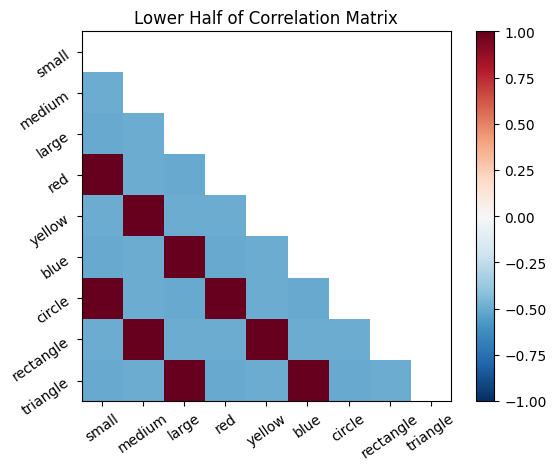

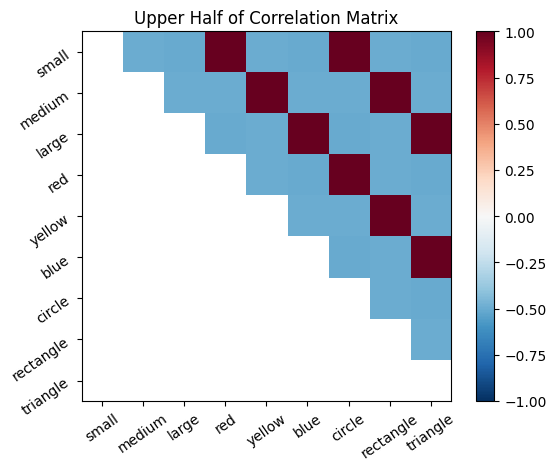

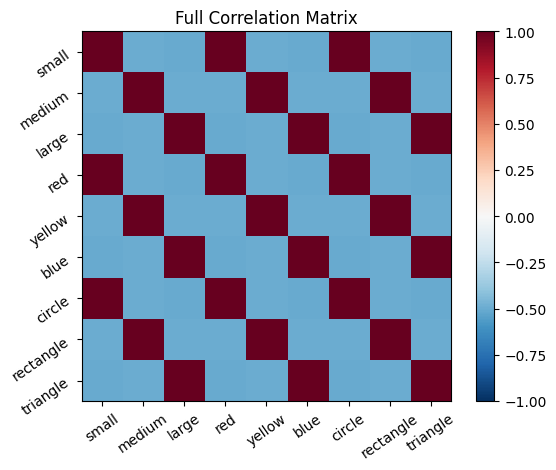

In [12]:
# Compute the correlation matrix
cor_mat_command = np.corrcoef(sm_3_uniform,
                              rowvar=False)  # rowvar=False indicates that the columns represent the features
ub = np.abs(cor_mat_command).max()  # Maximum absolute correlation value
lb = -ub  # Lower bound for the color scale


# Define a function to plot the correlation matrix
def plot_correlation_matrix(matrix, mask=None, title="Correlation Matrix", lb=lb, ub=ub):
    """
    Function to plot a correlation matrix with optional masking
    """
    plt.figure()
    plt.title(title)
    plt.xticks(np.arange(len(feature_names)), feature_names, rotation=35)  # Rotate labels for better visibility
    plt.yticks(np.arange(len(feature_names)), feature_names, rotation=35)
    if mask is not None:
        matrix = np.ma.array(matrix, mask=mask)
    plt.imshow(matrix, cmap='RdBu_r', vmin=lb, vmax=ub)
    plt.colorbar()
    plt.show()


# Visualize lower half, upper half, and full correlation matrices
# Note: The correlation matrix is symmetric across the diagonal
plot_correlation_matrix(cor_mat_command, mask=np.triu(cor_mat_command), title="Lower Half of Correlation Matrix")
plot_correlation_matrix(cor_mat_command, mask=np.tril(cor_mat_command), title="Upper Half of Correlation Matrix")
plot_correlation_matrix(cor_mat_command, title="Full Correlation Matrix")


The correlation matrix, `cor_mat_command`, represents all connections between all neurons. The principal diagonal (top left to bottom right) is the self-correlation; a neuron is perfectly correlated with itself, so it should be all 1's. Except on the diagonal, every connection is depicted twice in this matrix. For example, [1,2] is the same value as [2,1].  

The correlation matrix can be thought of as the probability that the firing of two neurons will coincide, based on the frequency that their firing coincided in the past. The rows and columns of the matrix represent the features, ordered as they are in our feature list. Each entry represents the connection between a pair of neurons. One can think of the entries in the correlation matrix as directional probability, where the magnitude gives the strength of association, while the sign gives positive or negative association.

Positive values mean that the neurons tend to both 1) fire together and 2) be inactive at the same time. Negative values mean that when one of the neurons is firing, the other one tends to be inactive (and vice a versa). Values close to 0 mean that the neurons do not exhibit a linear relationship in their patterns of activity. Note, the correlations only detect linear relationships. For example, if the activity of two neurons had a perfectly U shaped relationship that would produce a correlation of 0.)      

Once the connections between all the feature neurons have been established from learning, these connections can be useful for performing pattern completion. For example, if the model is given an object that is a "triangle", it can use the connections to infer that this object is probably also "large" and "blue".

#### Stimulus Driven Activation

To demonstrate how the trained model (the correlation matrix, `cor_mat_command`) responds to stimuli, we present it an incomplete stimulus. The model should complete the stimulus based on the learned associations.

Consider the following incomplete stimulus: `[0, 0, 0, 0, 0, 0, 0, 0, 1]`. This stimulus represents only a "triangle." We can use the learned associations to predict the other features of the object by multiplying the incomplete stimulus by the correlation matrix. The resulting vector will contain the predicted activations for all features.


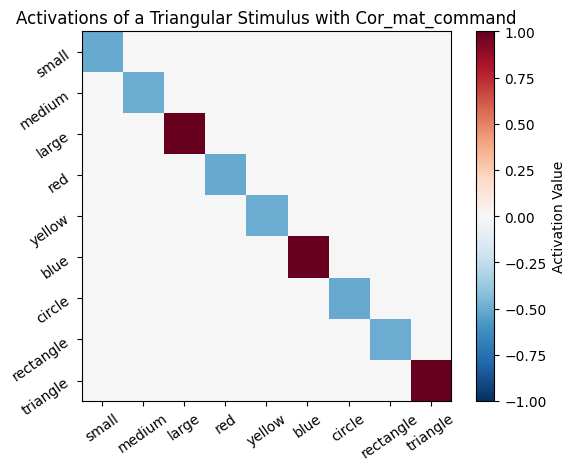

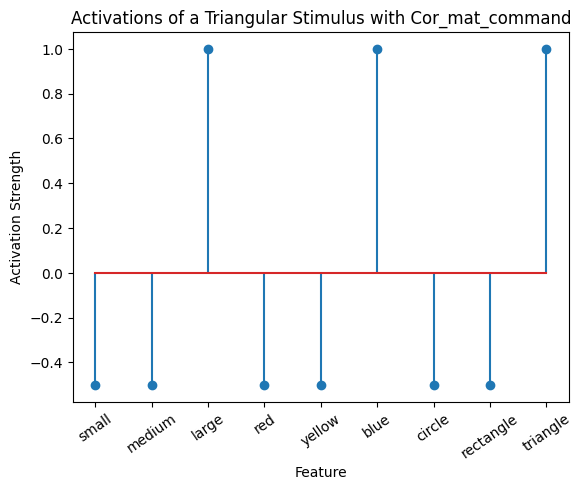

In [13]:
# Define the incomplete stimulus
triangle = [0, 0, 0, 0, 0, 0, 0, 0, 1]

# Step 1: Construct a diagonal matrix from the stimulus vector
# This represents activating only the "triangle" neuron
diag_triangle = np.diag(triangle)

# Step 2: Multiply the diagonal matrix with the correlation matrix
# This selects and scales rows of the correlation matrix based on the stimulus
# It represents how activating the "triangle" neuron propagates activation to other neurons
active_mat = np.dot(diag_triangle, cor_mat_command)

# Step 3: Sum the rows to compute the total activation for each feature
# This consolidates the contributions from the activated neurons
active_mat = active_mat.sum(axis=0)


# This plot visualizes the activations from a triangular stimulus. The output is an array,
# and its values are mapped to the principal diagonal of this image. All off-diagonal elements are zero.
def plot_activation(vec, title, lb=lb, ub=ub):
    plt.figure()
    plt.title(title)
    plt.imshow(np.diag(vec), cmap='RdBu_r', vmin=lb, vmax=ub)
    plt.xticks(np.arange(len(feature_names)), feature_names, rotation=35)
    plt.yticks(np.arange(len(feature_names)), feature_names, rotation=35)
    plt.colorbar(label="Activation Value")
    plt.show()


plot_activation(active_mat, "Activations of a Triangular Stimulus with Cor_mat_command")


# This plot shows the same values but as a line plot.
def plot_activation_line(vec, title):
    plt.figure()
    plt.stem(vec)
    plt.title(title)
    plt.xticks(np.arange(len(feature_names)), feature_names, rotation=35)
    plt.xlabel("Feature")
    plt.ylabel("Activation Strength")
    plt.show()


plot_activation_line(active_mat, "Activations of a Triangular Stimulus with Cor_mat_command")

## Accumulating Evidence

In the previous example we made an over-simplifying assumption that the stimuli were all present at the same time. But most learning doesn't happen at a single moment in time, it builds up over experience. We also computed correlations that include negative values, but the most basic implementation of "fire together wire together" should only detect simultaneous firing, not simultaneous absences of firing. So next we can build a model that accumulates evidence over time and only detects neurons firing together.  

### Hebbian Model #2

We start with an empty connectivity matrix, full of 0's to indicate that no neurons are wired together yet.  When two neurons fire at the same time we'll add a weight of 0.1 to the matrix.

In [20]:
sm_3_uniform
size_f

9

0 [[1 0 0 1 0 0 1 0 0]]


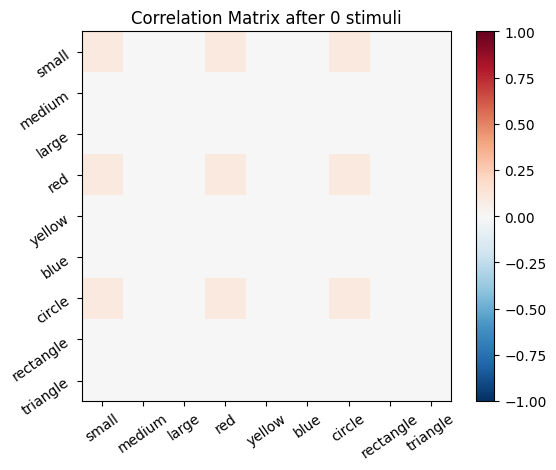

1 [[1 0 0 1 0 0 1 0 0]]


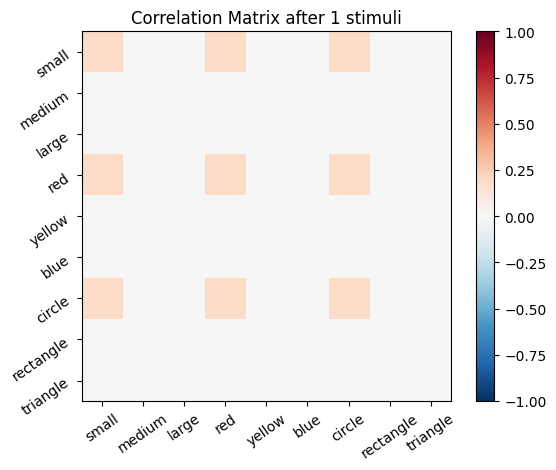

2 [[1 0 0 1 0 0 1 0 0]]


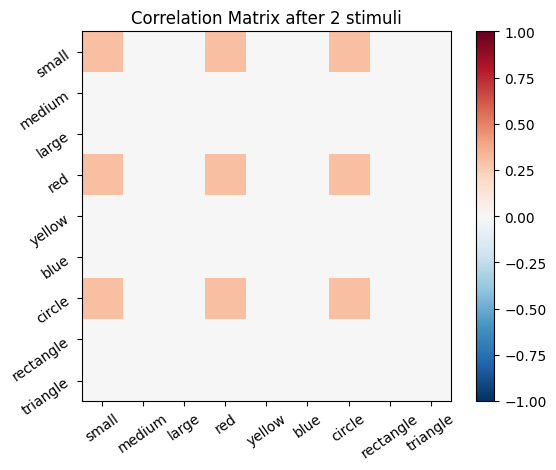

3 [[0 1 0 0 1 0 0 1 0]]


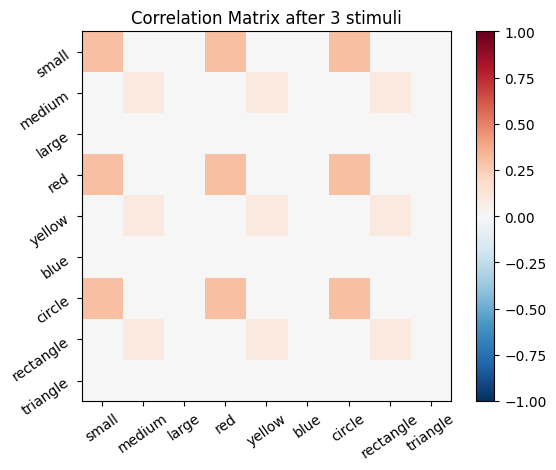

4 [[0 1 0 0 1 0 0 1 0]]


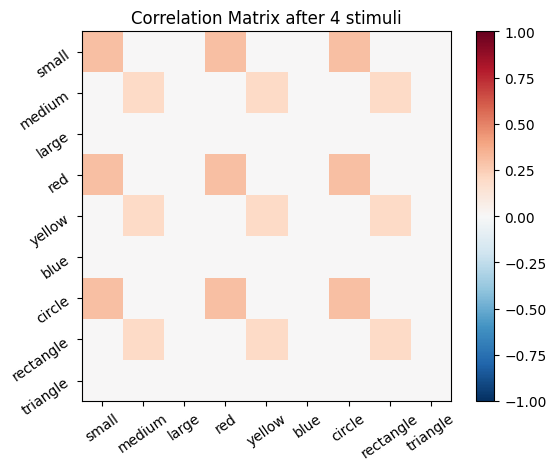

5 [[0 1 0 0 1 0 0 1 0]]


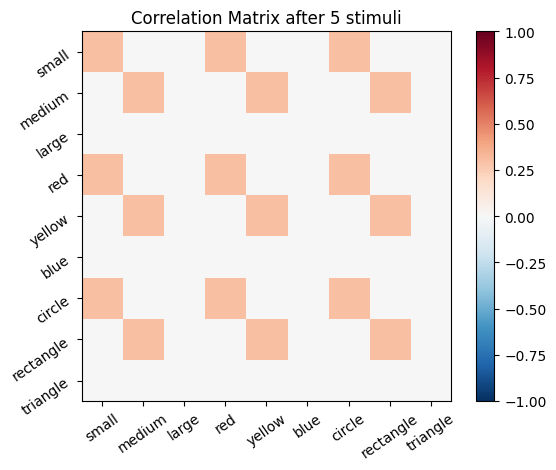

6 [[0 0 1 0 0 1 0 0 1]]


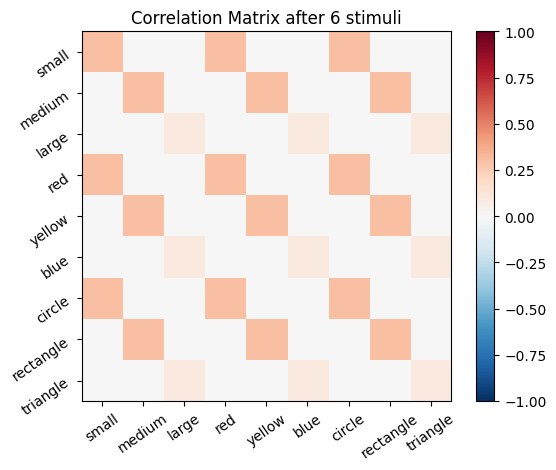

7 [[0 0 1 0 0 1 0 0 1]]


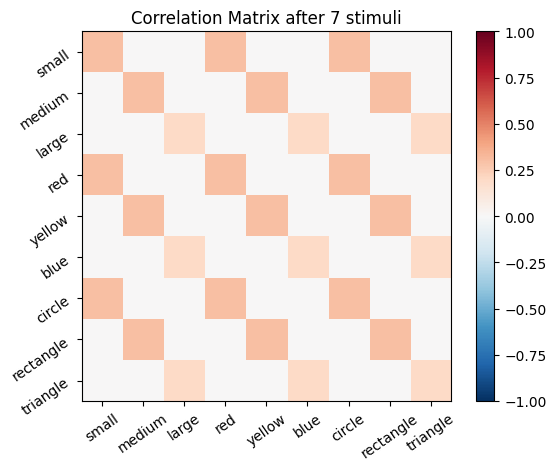

8 [[0 0 1 0 0 1 0 0 1]]


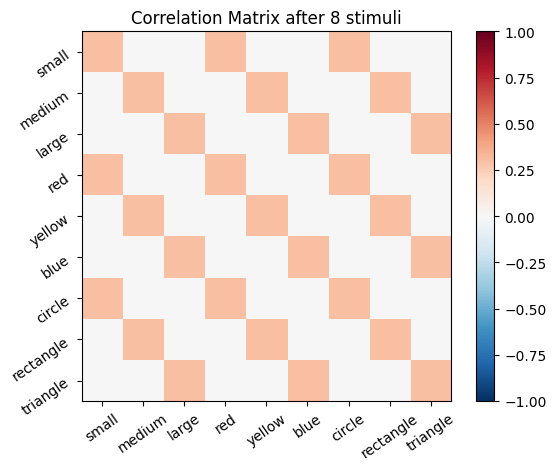

In [19]:
# Create a new, all zeros correlation matrix
cor_mat_manual = np.zeros((size_f, size_f))

# Get the number of stimuli (number of rows in sm_3_uniform)
size_s = sm_3_uniform.shape[0]

# Define the learning rate as a parameter - this is how much the weights will change each stimulus
learning_rate = .1

for i, stim in enumerate(sm_3_uniform):  # progress through all stimuli
    print(i,stim);
    #x changes in the outer loop:
    for x in range(size_f):
      #y changes in the inner loop:
        for y in range(size_f):
          #so every (x, y) pair gets visited:
            cor_mat_manual[x, y] = cor_mat_manual[x, y] + (stim[0, x] * stim[0, y] * learning_rate) # the latter multiplies stim at (0,x) by stim at (0,y) by the learning rate (size of the update)
    # Plot the correlation matrix after each stimulus
    plot_correlation_matrix(cor_mat_manual, title=f'Correlation Matrix after {i} stimuli')

#### Exercise 1{exercise}

Suppose you want to know what a Hebbian Model #1 learner would associate and infer it had seen 10 small red circles, 7 medium yellow rectangles, and 4 large blue triangles if instead of the stimuli described earlier. Then, what does it infer if we present it the color purple?

Create a set of stimuli and then a correlation matrix that fit this situation. How do you code purple as a stimulus? What output do you get from testing the trained model on an input of purple?  Explain how you interpret this output.

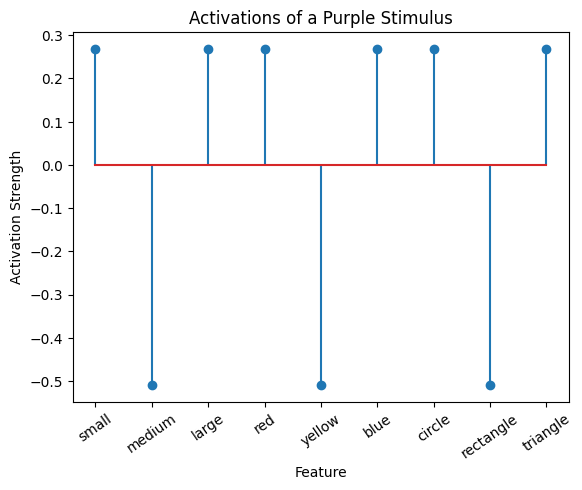

In [15]:
# Create a set of stimuli
stimulus_matrix =  np.matrix([src,src,src,src,src,src,src,src,src,src,myr,myr,myr,myr,myr,myr,myr,lbt,lbt,lbt,lbt])


# Compute the correlation matrix with numpy
correlation_matrix =  np.corrcoef(stimulus_matrix,
                              rowvar=False)  # rowvar=False indicates that the columns represent the features
ub = np.abs(cor_mat_command).max()  # Maximum absolute correlation value
lb = -ub  # Lower bound for the color scale


# Define the purple stimulus
purple = [0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]

# Compute the activations for the purple stimulus
# TODO: Your code here
  # Step 1: Construct a diagonal matrix from the stimulus vector
  # This represents activating only the "triangle" neuron
diag_purple = np.diag(purple)

  # Step 2: Multiply the diagonal matrix with the correlation matrix
  # This selects and scales rows of the correlation matrix based on the stimulus
  # It represents how activating the "triangle" neuron propagates activation to other neurons
active_mat = np.dot(diag_purple, correlation_matrix)

  # Step 3: Sum the rows to compute the total activation for each feature
  # This consolidates the contributions from the activated neurons
active_mat_purple = active_mat.sum(axis=0)

# Plot the activations for the purple stimulus
plot_activation_line(active_mat_purple, "Activations of a Purple Stimulus")

Solution 1{solution}

```python
# Create a set of stimuli
stimulus_matrix = np.matrix([src] * 10 + [myr] * 7 + [lbt] * 4)

# Compute the correlation matrix with numpy
correlation_matrix = np.corrcoef(stimulus_matrix, rowvar=False)

# Define the purple stimulus
purple = [0, 0, 0, .5, 0, .5, 0, 0, 0]

# Compute the activations for the purple stimulus
diag_purple = np.diag(purple)
active_mat_purple = np.dot(diag_purple, correlation_matrix)
active_mat_purple = active_mat_purple.sum(axis=0)

# Plot the activations for the purple stimulus
plot_activation_line(active_mat_purple, "Activations of a Purple Stimulus")
```

#### Exercise 2{exercise}

In the example of [Hebbian Model #2](#hebbian-model-2) above, we used 3 loops to update all the values in cor_mat. You should reason through how and why this works by considering a few specific examples. When i = 0, what are the values of stim?  When x and y equal 0, what number will be updated in cor_mat?

**Exercise 2a**

There is a more compact way to accomplish the same result as the 3 loops above, using the transpose function and a single loop.    

You can transpose an array (turn rows into columns, and columns into rows) by adding .T to the array:

```python
stim_mat[0,:].T
```

And you can do matrix multiplication of two arrays with the appropriate dimensionality using @:

```python
stim_mat[0,:].T@stim_mat[0,:]
```

Now create a single loop that progresses through the stimuli in stim_mat and creates the same resulting cor_mat2 values as above.  


In [16]:
# Create a new, all zeros correlation matrix
cor_mat_compact = np.zeros((size_f, size_f))

# Get the number of stimuli (number of rows in sm_3_uniform)
size_s = sm_3_uniform.shape[0]

# Define the learning rate as a parameter - this is how much the weights will change each stimulus
learning_rate = .1

for stim in enumerate(sm_3_uniform):  # progress through all stimuli
    cor_mat_compact =  # TODO: Your code here

# Verify that we got the same answer as before

# allclose returns True if each entry of the first array is equal to the corresponding entry in the second, and False otherwise
same_ans = np.allclose(cor_mat_compact, cor_mat_manual)
if same_ans:
    print('cor_mat_compact and cor_mat_manual matrices are equal')

SyntaxError: invalid syntax (ipython-input-3012025021.py, line 11)

Solution 2a{solution}

```python
# Create a new, all zeros correlation matrix
cor_mat_compact = np.zeros((size_f, size_f))

# Get the number of stimuli (number of rows in sm_3_uniform)  
size_s = sm_3_uniform.shape[0]

# Define the learning rate as a parameter - this is how much the weights will change each stimulus
learning_rate = .1

for stim in sm_3_uniform:  # progress through all stimuli
  cor_mat_compact = cor_mat_compact +  learning_rate * stim.T @ stim

# Verify that we got the same answer as before

# allclose returns True if each entry of the first array is equal to the corresponding entry in the second, and False otherwise
same_ans=np.allclose(cor_mat_compact, cor_mat_manual)
if same_ans:
  print('cor_mat_compact and cor_mat_manual matrices are equal')
```

**Exercise 2b**

Matrix multiplication can simplify the code even more, eliminating the need for any loops.  Use the transpose function .T and matrix multiplication function @ to matrix multiply stim_mat by itself transposed.  As a final step, multiply this entire function by a value that will reproduce the same matrix values in cor_mat above.

In [ ]:
cor_mat_compactest =  # TODO: Your code here

# Verify correctness
same_ans = np.allclose(cor_mat_compactest, cor_mat_manual)
if same_ans:
    print('cor_mat_compactest and cor_mat_manual matrices are equal')

Solution 2b{solution}

```python
cor_mat_compactest = sm_3_uniform.T @ sm_3_uniform * learning_rate

# Verify correctness
same_ans = np.allclose(cor_mat_compactest,cor_mat_manual)
if same_ans:
  print('cor_mat_compactest and cor_mat_manual matrices are equal')
```

## Hebbian Learning Processing

In the following section, we will explore how Hebbian learning correlation matrices can be processed to achieve "normalization" and to remove "self-correlation". Similar to Exercise 1, in the next cell ,we create a matrix `sm_nonuniform` of stimuli that includes 100 small red circles, 70 medium yellow rectangles, and 40 large blue triangles. Then, we will use transpose and matrix multiplication to build a matrix of connection strengths `cor_mat_nonuniform`.    

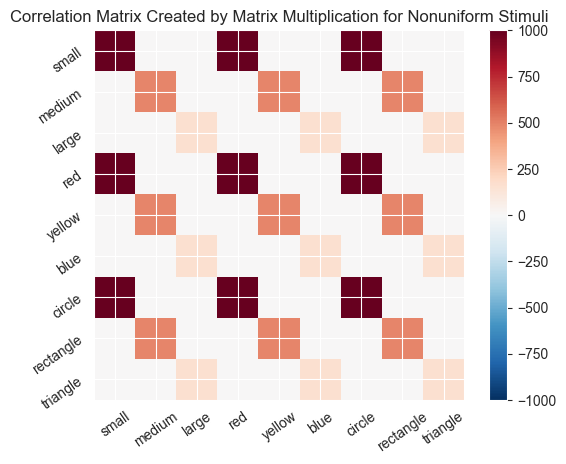

In [ ]:
learning_rate = .1

sm_nonuniform = np.array([100 * np.array(src), 70 * np.array(myr), 40 * np.array(lbt)])
cor_mat_nonuniform = sm_nonuniform.T @ sm_nonuniform * learning_rate

ub = np.amax(np.amax(np.abs(cor_mat_nonuniform)))
lb = -ub

plot_correlation_matrix(
    cor_mat_nonuniform,
    title="Correlation Matrix Created by Matrix Multiplication for Nonuniform Stimuli",
    lb=lb,
    ub=ub
)

Then, we present a purple stimulus to this model.


In [ ]:
purple = np.array([0, 0, 0, .5, 0, .5, 0, 0, 0])

active_mat_purple = purple @ cor_mat_nonuniform

#### Exercise 3{exercise}

To calculate the activation, we use the following shorter version:

```python
active_mat_purple = purple @ cor_mat_nonuniform
```

Instead of the calculations used above:

```python
diag_purple = np.diag(purple)
scaled_mat = np.dot(diag_purple, cor_mat_nonuniform)
active_mat_purple = scaled_matrix.sum(axis=0)
```

Please convince yourself, that these are equivalent



Solution 3{solution}

**Method 1**

In the first method, `purple @ cor_mat_nonuniform` performs matrix multiplication. This computes the dot product of the purple vector with each column of cor_mat_nonuniform and is mathematically equivalent to:

$$
activation_j = \sum_{i} purple_i \cdot cor\_mat\_nonuniform_{i, j}
$$

The second method constructs a diagonal matrix `diag_purple`, multiplies it with the correlation matrix `cor_mat_nonuniform` and then sums along rows:

**Method 2**

*Step 1:* `diag_purple = np.diag(purple)`

$$
diag\_purple_{i,j} =
\begin{cases}
\text{purple}_i & \text{if } i = j, \\
0 & \text{otherwise.}
\end{cases}
$$

*Step 2:* `scaled_mat = np.dot(diag_purple, cor_mat_nonuniform)`

$$
scaled\_mat_{i, j} = diag\_purple_{i, j} \cdot cor\_mat\_nonuniform_{i, j}
$$

*Step 3:* `active_mat_purple = scaled_mat.sum(axis=0)`

$$
activation_j &= \sum_{i} scaled\_mat_{i, j} \\
&= \sum_{i} diag\_purple_{i, j} \cdot cor\_mat\_nonuniform_{i, j}
$$

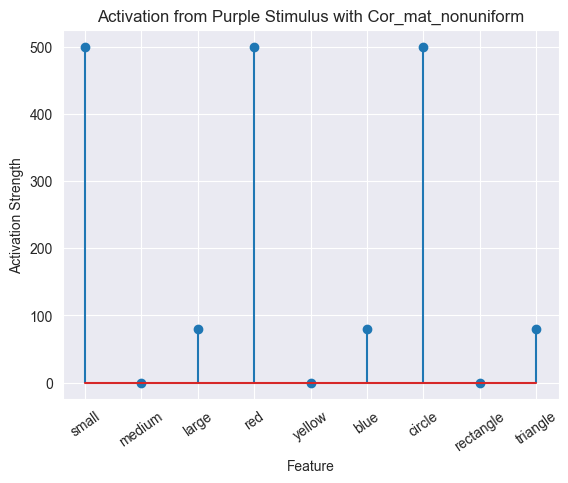

In [ ]:
plot_activation_line(active_mat_purple, "Activation from Purple Stimulus with Cor_mat_nonuniform")

The model associated the color purple mostly with the small red circle, slightly with the large blue triangle, and not at all with the medium yellow rectangle. This makes sense because the model was trained with more exposure to small red circles. Purple activated red, so it strongly associates with small and circle. Purple also activated blue and its associates, large and triangle.

### Bounding Output

It is often a good idea to set boundaries on the values of neuron activity in a model. Most neurons can only physically fire a maximum of a few hundred times per second, and tend to fire closer to the order of around 10 times per second. Even when we take the liberty of ignoring physical constraints on individual neurons (or even if we assume the unit we are modeling is composed of thousands of neurons and could, in principle, cumulatively send hundreds of thousands of action potentials per second), unbounded values that tend toward +/- infinity cause practical problems for many functions. In the following cells we will explore some ways to regularize our model outputs.

#### Normalize The Activation Matrix

We can normalize the activation matrix

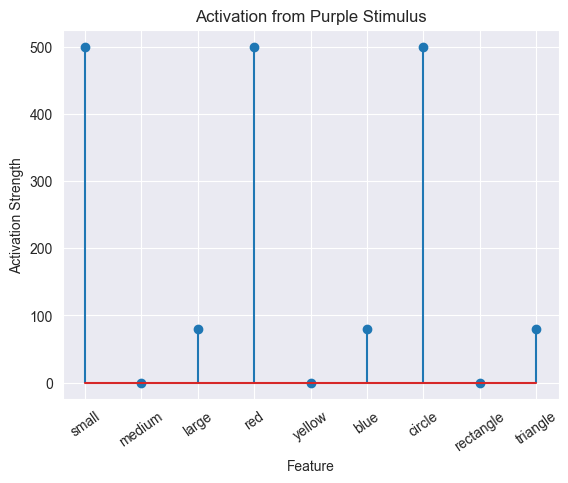

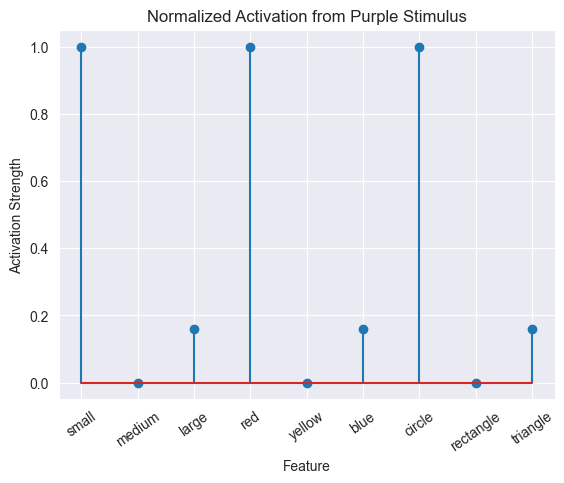

In [ ]:
# Normalize the output by dividing with the max:
active_mat_purple_normalized = active_mat_purple/max(active_mat_purple)

plot_activation_line(active_mat_purple, 'Activation from Purple Stimulus')
plot_activation_line(active_mat_purple_normalized, 'Normalized Activation from Purple Stimulus')

#### Normalize The Correlation Matrix

Instead, we can also normalize the correlation matrix:

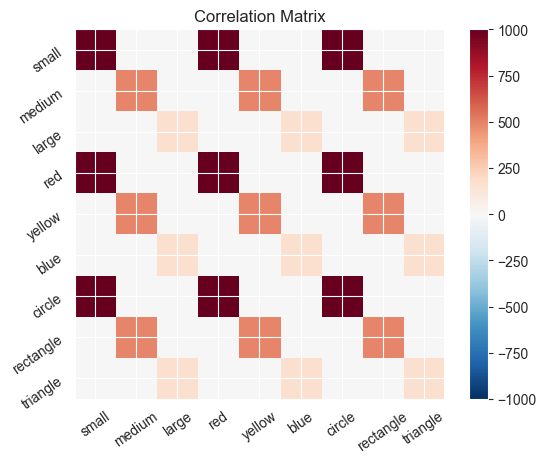

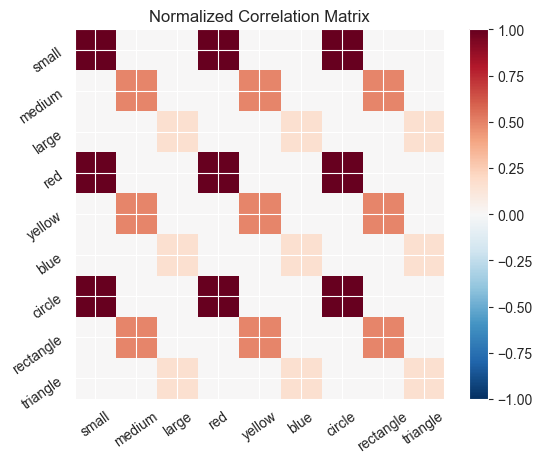

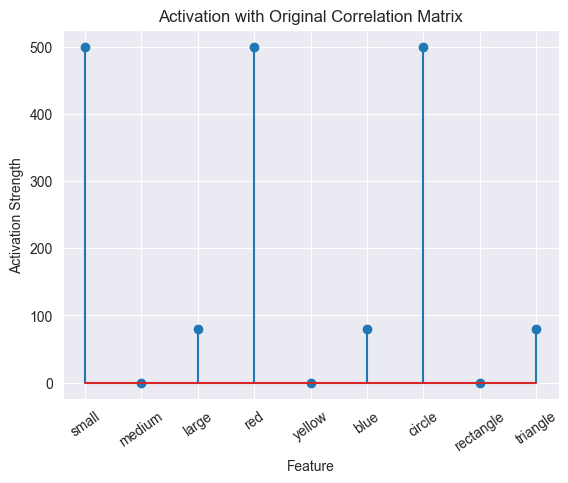

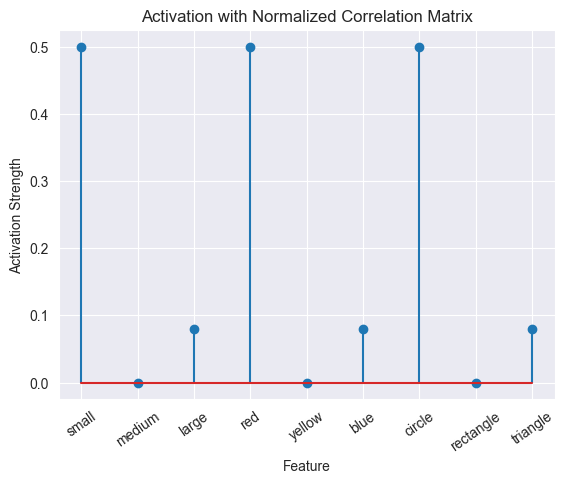

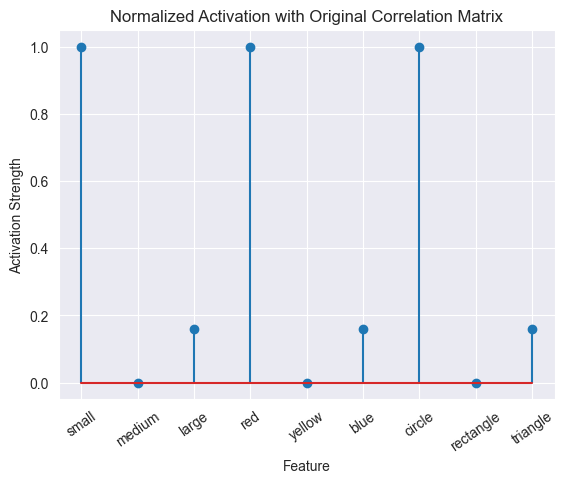

In [ ]:
# Calculate the absolute of the maximum of the correlation matrix
max_cor_mat = np.max(cor_mat_nonuniform)
max_cor_mat_absolute = np.abs(max_cor_mat)

# Set the lower and upper bound for the original matrix
ub_cor_mat = max_cor_mat_absolute
lb_cor_mat = -ub

# Calculate the normalized correlation matrix
cor_mat_nonuniform_normalized = cor_mat_nonuniform / max_cor_mat_absolute

# The normalized upper and lower bounds are 1. and -1. respectivly
ub_cor_mat_normalized = 1.
lb_cor_mat_normalized = -1.

# Visualize the matrices
plot_correlation_matrix(
    cor_mat_nonuniform,
    title='Correlation Matrix',
    lb=lb_cor_mat,
    ub=ub_cor_mat)
plot_correlation_matrix(
    cor_mat_nonuniform_normalized,
    title='Normalized Correlation Matrix',
    lb=lb_cor_mat_normalized,
    ub=ub_cor_mat_normalized
)

# Calculate the activation for the purple stimulus with both matrices:
active_mat_purple = purple @ cor_mat_nonuniform
active_mat_purple_cmn = purple @ cor_mat_nonuniform_normalized

# Visualize the Activations
plot_activation_line(active_mat_purple, 'Activation with Original Correlation Matrix')
plot_activation_line(active_mat_purple_cmn, 'Activation with Normalized Correlation Matrix')
plot_activation_line(active_mat_purple_normalized, 'Normalized Activation with Original Correlation Matrix')

### Self-correlation

Up until this point, we have been creating correlation matrices that include self-correlation. That is, a stimulus is positively correlated with itself. This makes sense, because all stimuli correlate with themselves. That is, if we are shown something red, we know we have seen something red. However, if we consider what an output of a Hebbian system should be: the stimuli the learner *associates* with an input (I see red, I think stop sign), this doesn't seem quite right.  After all, if one were prompted to respond to the word "red" with the first word that comes to mind, one would not typically respond, "red".  

From another perspective, a neuron with positive excitatory connections to itself would behave a bit like a microphone placed next to a speaker that is amplifying the input to the microphone -- a runaway positive feedback loop.  In most cases we don't want our models to have seizures.   
  
It follows, that when constructing correlation matrices, it could be useful to remove self-correlation.

#### Exercise 4{exercise}

Create a correlation matrix that does not include self-correlation.

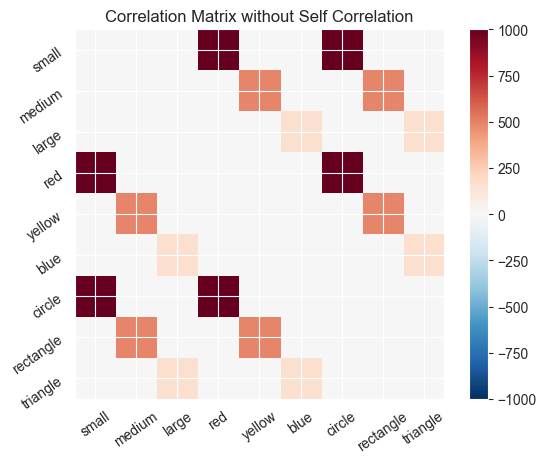

In [ ]:
# Calculate the Correlation Matrix
learning_rate = .1
cor_mat_no_self = sm_nonuniform.T @ sm_nonuniform * learning_rate

# TODO: Your code here

# Visualize the Correlation Matrix
ub = np.abs(np.max(cor_mat_no_self))
lb = -ub

plot_correlation_matrix(cor_mat_no_self, title= 'Correlation Matrix without Self Correlation', lb=lb, ub=ub)

Solution 4{solution}

```python
# Calculate the Correlation Matrix
learning_rate = .1
cor_mat_no_self = sm_nonuniform.T @ sm_nonuniform * learning_rate

for i in range(cor_mat_no_self.shape[0]):
    cor_mat_no_self[i,i]=0

# Visualize the Correlation Matrix
ub = np.abs(np.max(cor_mat_no_self))
lb = -ub

plot_correlation_matrix(cor_mat_no_self, title= 'Correlation Matrix without Self Correlation', lb=lb, ub=ub)
```

Shorter:
```python
# Calculate the Correlation Matrix
learning_rate = .1
cor_mat_no_self = sm_nonuniform.T @ sm_nonuniform * learning_rate

np.fill_diagonal(cor_mat_no_self, 0)

# Visualize the Correlation Matrix
ub = np.abs(np.max(cor_mat_no_self))
lb = -ub

plot_correlation_matrix(cor_mat_no_self, title= 'Correlation Matrix without Self Correlation', lb=lb, ub=ub)
```

## Implementation In PsyNeuLink

Hebbian learning is achieved in PsyNeuLink by creating an appropriately sized recurrent transfer mechanism, and enabling learning. To do this we simply set the argument `enable_learning` to `True` when defining your transfer mechanism.

To initialize your matrix to zero, as we have been doing, set the arguments "auto" to 0 and "hetero" to 0.


### Hebbian Model #3

In [ ]:
# Create a Composition
Hebb_comp = pnl.Composition()

# Create the mechanism ensuring `enable_learning` is set to `True`
Hebb_mech=pnl.RecurrentTransferMechanism(
    input_shapes=size_f,
    function=pnl.Linear,
    enable_learning = True,
    name='Hebb_mech',
    auto=0,
    hetero=0,
    )

# Add the mechanism to the composition
Hebb_comp.add_node(Hebb_mech)

/Users/younesstrittmatter/Documents/GitHub/younesStrittmatter/princeton/psyneulink-related/502B/.venv/lib/python3.11/site-packages/psyneulink/core/compositions/composition.py:4652: UserWarning: NodeRole.LEARNING should be assigned with caution to Composition-2. Learning Components are generally constructed automatically as part of a learning Pathway. Doing so otherwise may cause unexpected results.
  warnings.warn(f"{role} should be assigned with caution to {self.name}. "


Let's try training our new system on a single stimulus from the set we've been working with; small red circle.

We can run our system as many times as we like, using only one stimulus as input. In the following cell, we run the system 5 times (num_trials = 5).   

Does the system behave the way you expected it to? In what ways does it behave similar and different to the previous two Hebbian Models #1 & #2?

In [ ]:
# Set an execution id
Hebb_comp.execution_id = 1

# Define a function that plots the correlation matrix and the stimulus activation to use in the callback function after each strep of the PNL composition learn method
def vis_info():
    hebb_matrix = Hebb_mech.matrix.base
    active_mat = Hebb_mech.value[0]
    ub = np.amax(np.abs(hebb_matrix))
    lb = -ub
    plot_correlation_matrix(hebb_matrix, title="PNL Hebbian Matrix", lb=lb, ub=ub)
    plot_activation_line(active_mat, 'Activation from Stimulus with PNL Hebbian Matrix')


inputs_dict = {Hebb_mech: src}
out = Hebb_comp.learn(num_trials=5,
                      call_after_trial=vis_info,
                      inputs=inputs_dict)

/Users/younesstrittmatter/Documents/GitHub/younesStrittmatter/princeton/psyneulink-related/502B/.venv/lib/python3.11/site-packages/psyneulink/core/compositions/composition.py:11665: UserWarning: learn() method called on 'Composition-2', but it has no learning components; it will be run but no learning will occur.
  warnings.warn(f"learn() method called on '{self.name}', but it has no learning components; "


NameError: name 'plot_correlation_matrix' is not defined

To better understand what is happening, try running your system with various inputs. To do this you will need to re-initialize the system by rerunning the cell that created Hebbian Model #3, or by copying that code into the top of the next cell. Models that learn get modified by running, and so we need to re-initialize to see how the model evolves with different kinds of input.

/Users/younesstrittmatter/Documents/GitHub/younesStrittmatter/princeton/psyneulink-related/502B/.venv/lib/python3.11/site-packages/psyneulink/core/compositions/composition.py:4652: UserWarning: NodeRole.LEARNING should be assigned with caution to Composition-6. Learning Components are generally constructed automatically as part of a learning Pathway. Doing so otherwise may cause unexpected results.
  warnings.warn(f"{role} should be assigned with caution to {self.name}. "
/Users/younesstrittmatter/Documents/GitHub/younesStrittmatter/princeton/psyneulink-related/502B/.venv/lib/python3.11/site-packages/psyneulink/core/compositions/composition.py:11665: UserWarning: learn() method called on 'Composition-6', but it has no learning components; it will be run but no learning will occur.
  warnings.warn(f"learn() method called on '{self.name}', but it has no learning components; "


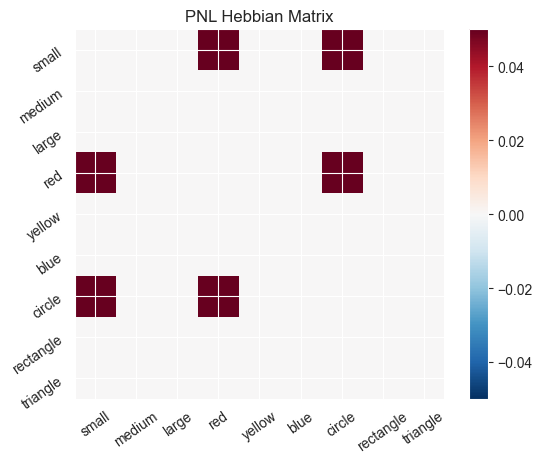

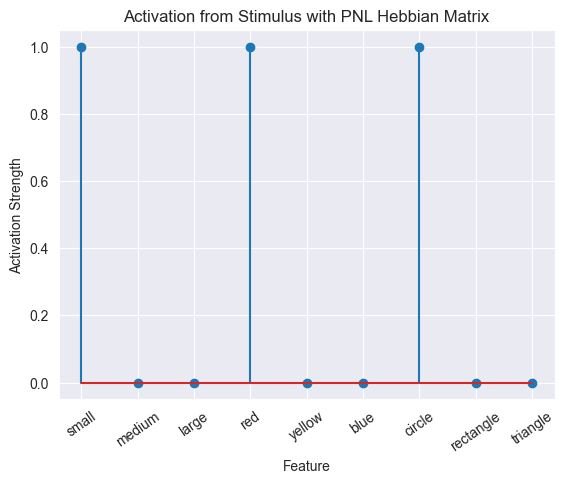

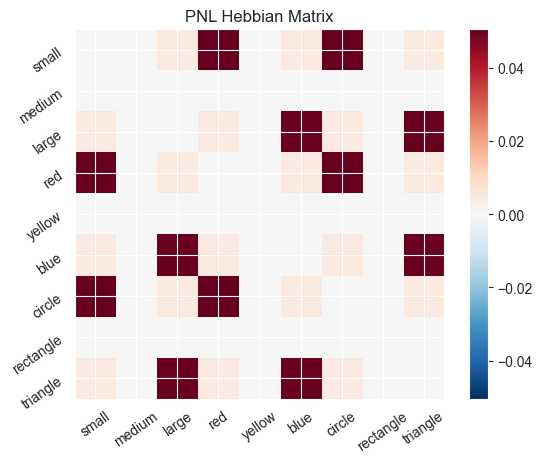

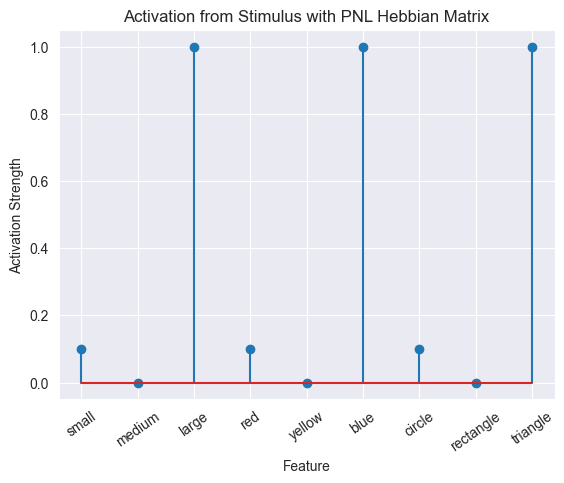

In [ ]:
# Create a Composition
Hebb_comp = pnl.Composition()

# Create the mechanism ensuring `enable_learning` is set to `True`
Hebb_mech=pnl.RecurrentTransferMechanism(
    input_shapes=size_f,
    function=pnl.Linear,
    enable_learning = True,
    name='Hebb_mech',
    auto=0,
    hetero=0,
    )

# Add the mechanism to the composition
Hebb_comp.add_node(Hebb_mech)

# Set an execution id
Hebb_comp.execution_id = 1

# Define a function that plots the correlation matrix and the stimulus activation to use in the callback function after each strep of the PNL composition learn method
def vis_info():
    hebb_matrix = Hebb_mech.matrix.base
    active_mat = Hebb_mech.value[0]
    ub = np.amax(np.abs(hebb_matrix))
    lb = -ub
    plot_correlation_matrix(hebb_matrix, title="PNL Hebbian Matrix", lb=lb, ub=ub)
    plot_activation_line(active_mat, 'Activation from Stimulus with PNL Hebbian Matrix')


# Set your input here:
zero_stim = [0] * size_f
stimulus_list = []  # e.g., [src, lbt]; [src, zero_stim, lbt]; [src, src, lbt]; [src, src, zero_stim, lbt]; ...
inputs_dict = {Hebb_mech: stimulus_list}
out = Hebb_comp.learn(num_trials=len(stimulus_list),
                      call_after_trial=vis_info,
                      inputs=inputs_dict)

During the first trials, the algorithms behaves very similarly to the Hebbian Model #2 we defined above (except with the diagonal entries being set to zero). However, after introducing a second stimulus, the model appears to learn several extra associations that were not learned by our previous model. It appears that the model is learning associations *between* different stimulus patterns, rather than just *within* a single pattern, as the previous models did. For example, it learns associations "small-medium", "small-yellow" and "small-rectangle", representing a mixture of the features from the small red circle with those of the medium yellow rectangle.

This behavior arises because PsyNeuLink implements a learning mechanism that is designed to be neurologically plausible. Instead of simply updating the weight matrix based on the current input alone (as in the Hebbian learning algorithm described above), it incorporates feedback and recurrent connections. For a deeper explanation of this mechanism, including its use of cycles and feedback, refer to [PsyNeuLink Composition Cycles and Feedback](https://princetonuniversity.github.io/PsyNeuLink/Composition.html#cycles-and-feedback).

To simulate the behavior of Hebbian Model #2, we can introduce zero-input intervals between the stimuli. These intervals reset the previous activation to zero, ensuring that only the current input contributes to the learning process. This mimics the behavior of the original Hebbian model by isolating each stimulus from the influence of prior activations.

In [ ]:
Hebb_comp = pnl.Composition()

Hebb_mech = pnl.RecurrentTransferMechanism(
    input_shapes=size_f,
    function=pnl.Linear,
    enable_learning=True,
    name='Hebb_mech',
    auto=0,
    hetero=0
)

Hebb_comp.add_node(Hebb_mech)

inputs_dict = {Hebb_mech: [src, zero_stim, myr]}
out = Hebb_comp.learn(num_trials=3,
                      call_after_trial=vis_info,
                      inputs=inputs_dict)

NameError: name 'pnl' is not defined

A less "hacky" way to accomplish the same thing is to define a function that clears the output of the network after each trial. This can be done by defining a suitable function to clear the value, and to call it after every trial in a similar fashion to how we called the vis_info function after each trial.

/Users/younesstrittmatter/Documents/GitHub/younesStrittmatter/princeton/psyneulink-related/502B/.venv/lib/python3.11/site-packages/psyneulink/core/compositions/composition.py:4652: UserWarning: NodeRole.LEARNING should be assigned with caution to Composition-24. Learning Components are generally constructed automatically as part of a learning Pathway. Doing so otherwise may cause unexpected results.
  warnings.warn(f"{role} should be assigned with caution to {self.name}. "
/Users/younesstrittmatter/Documents/GitHub/younesStrittmatter/princeton/psyneulink-related/502B/.venv/lib/python3.11/site-packages/psyneulink/core/compositions/composition.py:11665: UserWarning: learn() method called on 'Composition-24', but it has no learning components; it will be run but no learning will occur.
  warnings.warn(f"learn() method called on '{self.name}', but it has no learning components; "


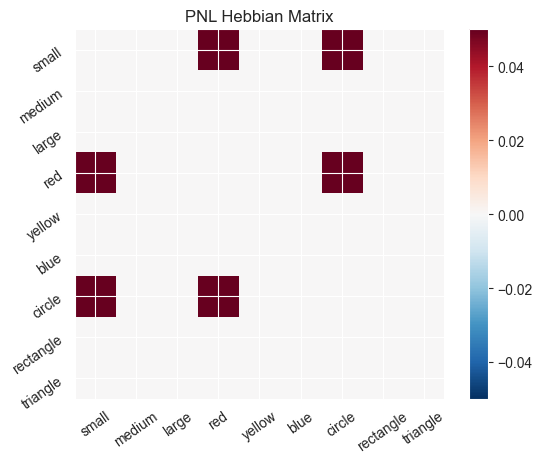

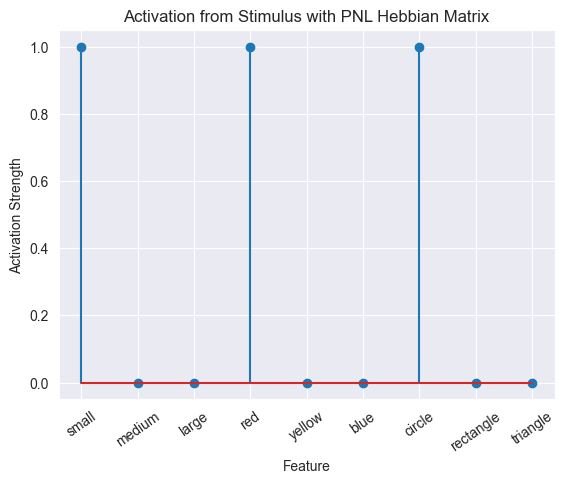

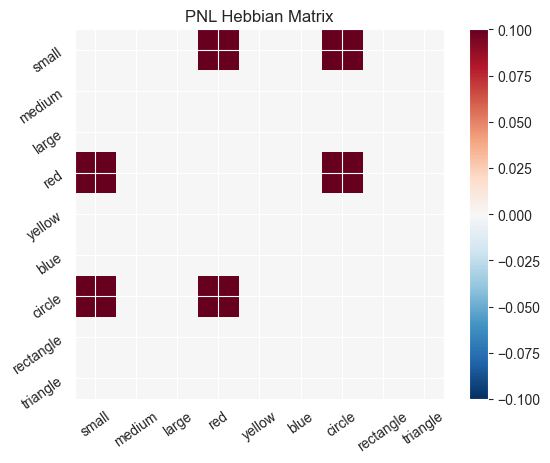

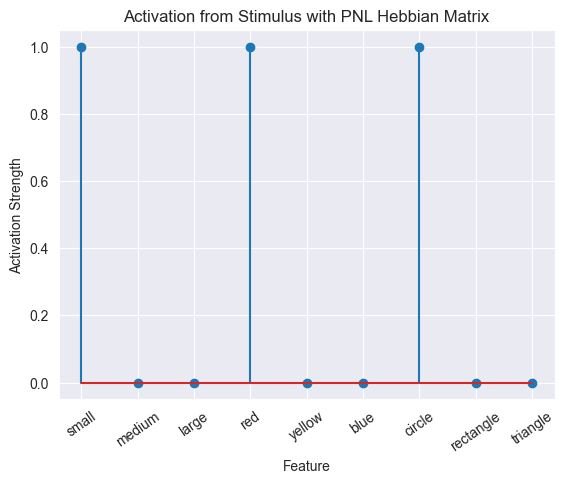

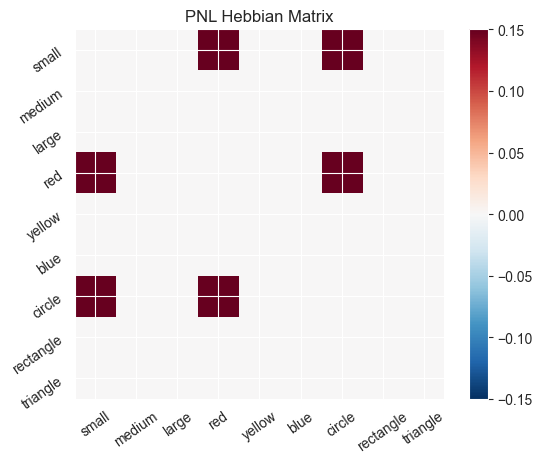

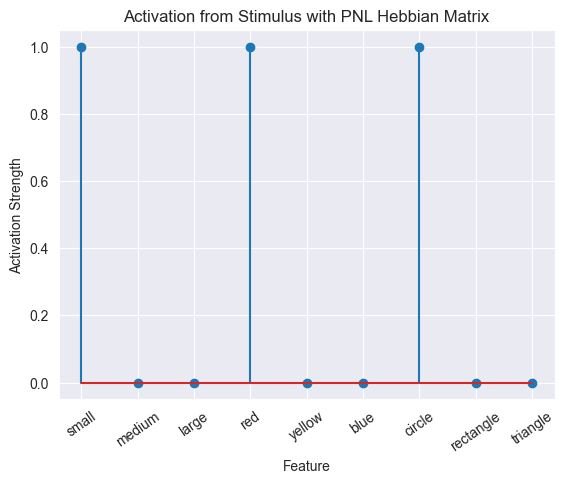

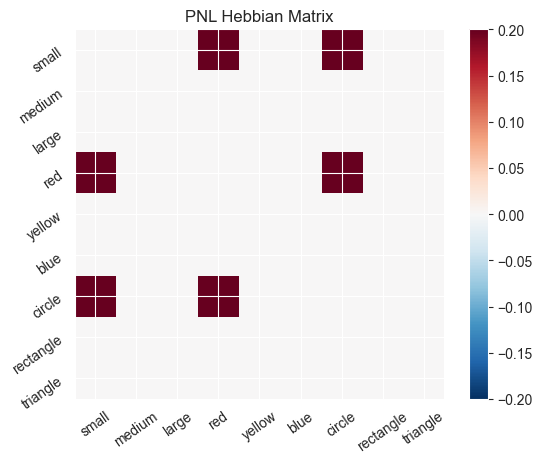

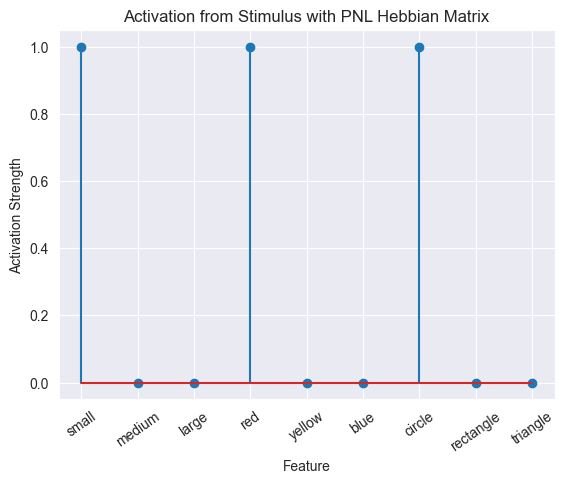

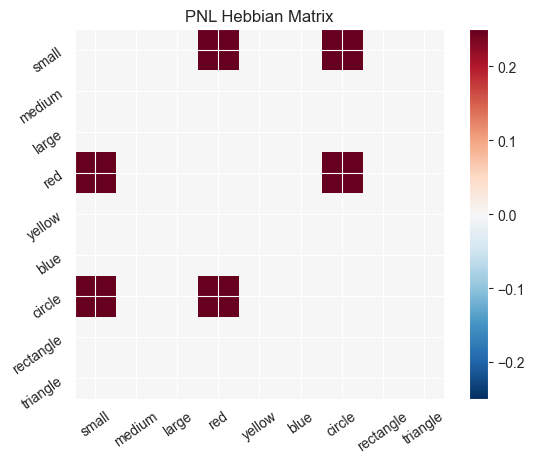

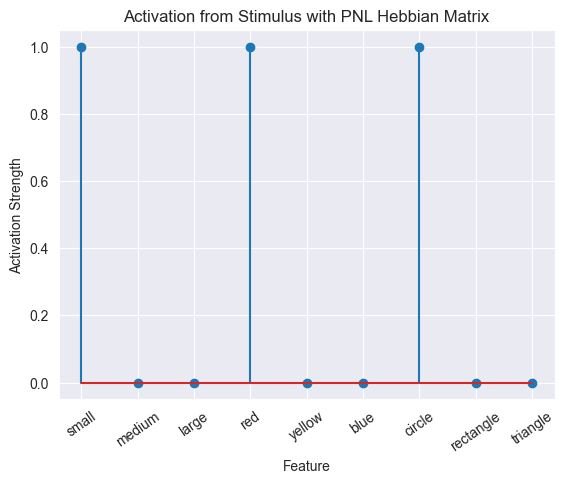

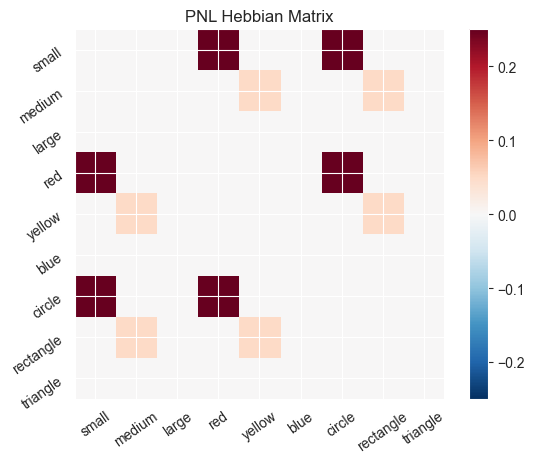

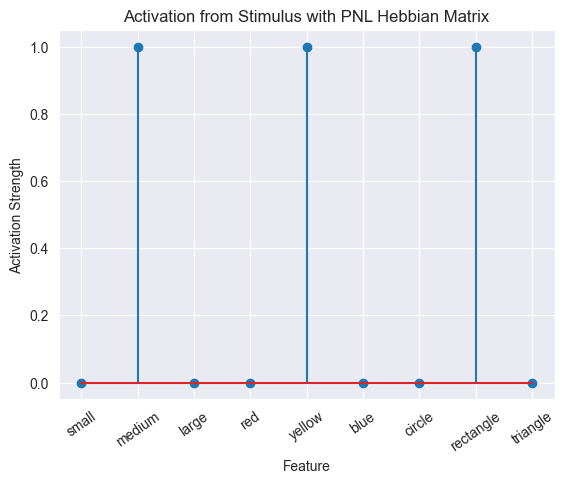

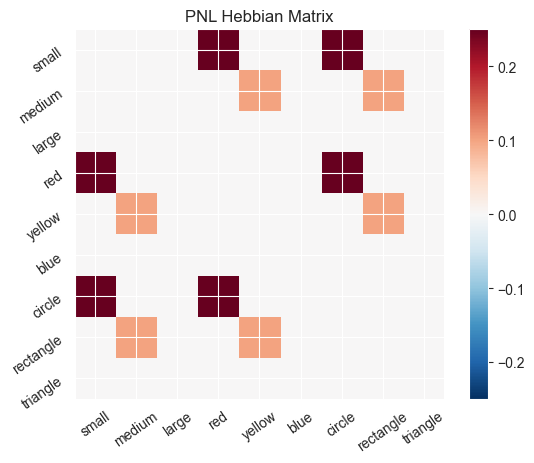

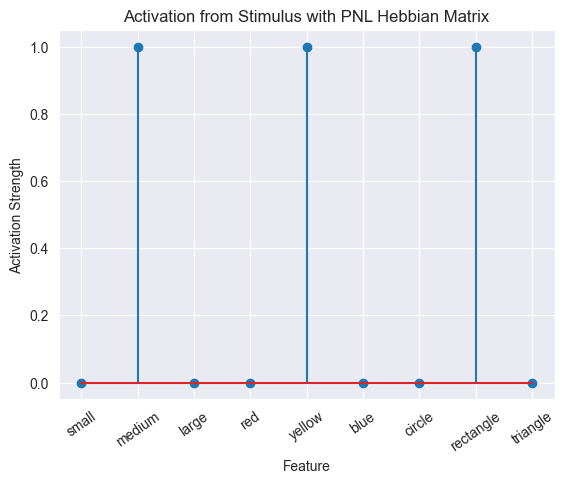

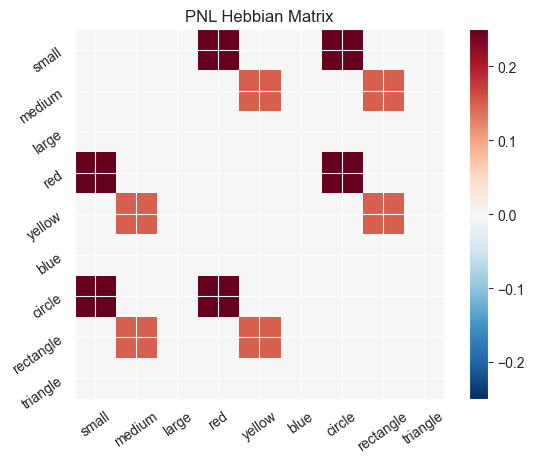

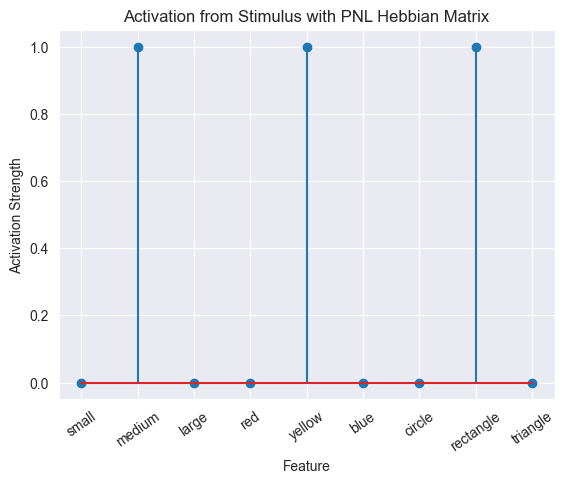

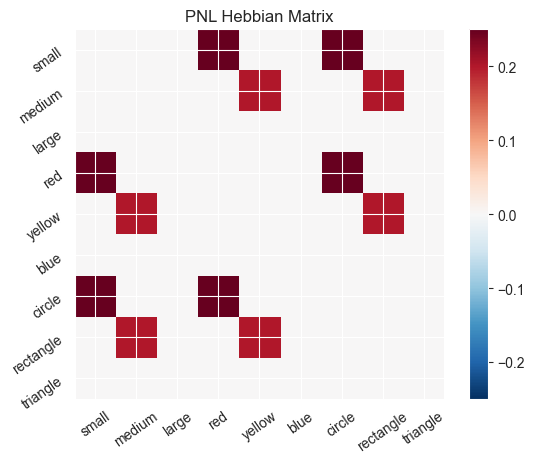

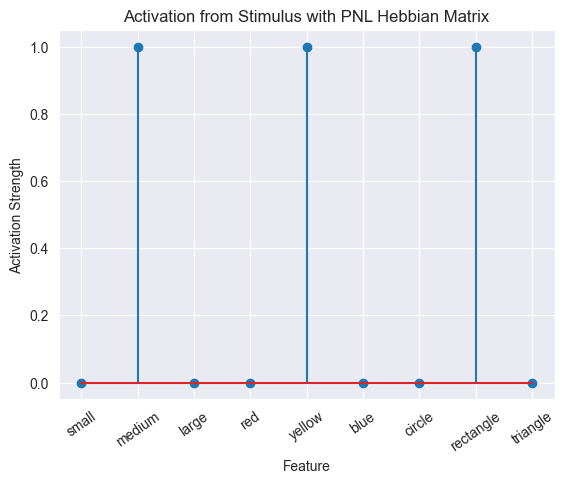

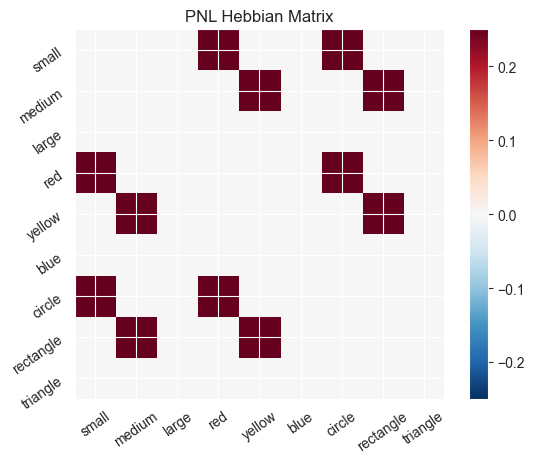

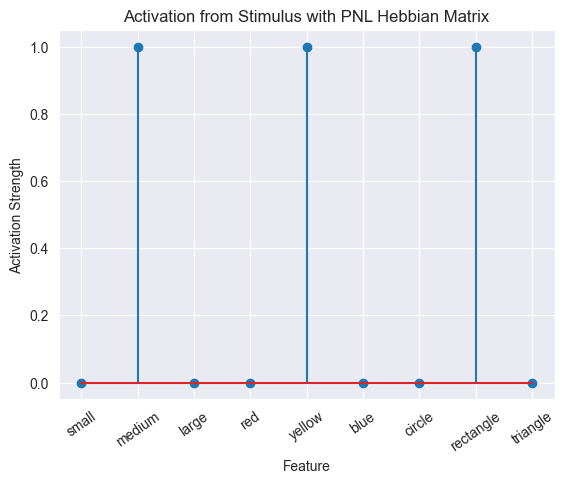

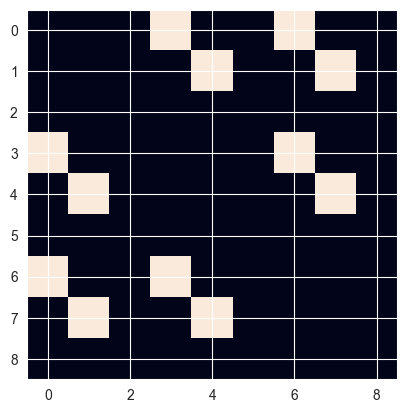

In [ ]:
Hebb_mech = pnl.RecurrentTransferMechanism(
    input_shapes=size_f,
    function=pnl.Linear,
    integrator_mode=True,
    integration_rate=1.,
    enable_learning=True,
    name='Hebb_mech',
    auto=0,
    hetero=0
)


def clear_value():
    Hebb_mech.reset()


def callback():
    vis_info()
    clear_value()


Hebb_comp = pnl.Composition()

Hebb_comp.add_node(Hebb_mech)

inputs_dict = {Hebb_mech: [src] * 5 + [myr] * 5}
out = Hebb_comp.learn(num_trials=10,
                      call_after_trial=callback,
                      inputs=inputs_dict)

ub = np.max(np.abs(Hebb_mech.matrix.base))
lb = -ub
plt.imshow(Hebb_mech.matrix.base, cmap='RdBu_r', vmin=lb, vmax=ub)

#### Exercise 5{exercise}

A colleague has a dataset were the behavior after exposing participants to different colors lead to different behaviors. They have analysed the behaviors and found that certain behaviors correlated. Now they want to model the behavior and propose one hot encoding the colors and using a Hebbian learning algorithm to learn the associations. What to you think of this plan? Why?

Solution 5{solution}

One hot encoded vectors form an orthogonal basis. This means all vectors are orthogonal and therefore uncorrelated. A hebbian learning algorithm, however, is designed to learn correlations between features. This means that the hebbian learning algorithm would not be able to learn anything from the data.

Tip: This is true for every orthogonal basis, not just one hot encoded vectors. However, one could try to first transform the data into a different basis that is not orthogonal, and then apply the hebbian learning algorithm.

#### Exercise 6{exercise}

**Stump the Hebbian Learning Algorithm**

Create a set of at least 9 unique stimuli using the same 9 features as above with properties that are impossible for the Hebbian Model #1 to learn and use for accurate inferences.  Even after exposure to the stimuli, the correlation matrix should be full of 0s. Explain why these results are produced. Try to come up with an interesting example that might map on to a real world situation (rather than just a mathematical gimic).  

Hint 1{hint}

Since the hebbian learning algorithm learns correlations between features, we can create an "unlearnable" set by ensuring that the features are not correlated. For example, we could create a set of "all possible" combinations (here for 3 features):

```python
all_combinations_3x3 = np.array([
    [0, 0, 0],
    [1, 0, 0], [0, 1, 0], [0, 0, 1],
    [1, 1, 0], [1, 0, 1], [0, 1, 1],
    [1, 1, 1]])

all_combination_corr = np.corrcoef(all_combinations_3x3.T)

# Set the diagonal to 0 (self-correlation is unavoidable)
np.fill_diagonal(all_combination_corr, 0)


plt.title("Correlation Matrix for all Combinations of 3 Features")
plt.yticks(np.arange(3))
plt.xticks(np.arange(3))
plt.imshow(all_combination_corr, cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar()
plt.show()
```

But a full set is not reasonable for the full set of 9 with the above described features (Why?).

Hint 2{hint}

Here are the two additional issues when using the above approach for 9 features:

1.   We had to use all combinations of features. For 3 features this was only $2^3=8$, but for 9 features we will need $2^9=512$.
2.   Some of the features that we have been using are mutually exclusive. For example, it does not make sense to have an object that is both large and small. So even if we could write out all of the combinations, not all of them will be meaningful.



Solution 6{solution}

We get circumvent these issues by using random sampling. This way we won't have to explicitly write out all of the combinations, but because of the Law of Large Numbers, we'll end up with a result that is very close to what it would be if we had written them all out. Also, when we do the sampling, we can make sure that we never sample inconsistent combinations like "small" and "big". This will lead to some correlations but with a large number of samples, the correlations will be very close to 0.

```python
# Set a seed for reproducibility
np.random.seed(42)

sampled_features=[]
for _ in range(100):
  feats=np.zeros(9)
  #first we sample a size (small,medium,large)
  size_feat=np.random.choice(3)
  feats[size_feat]=1
  #unlike sizes and shapes, colors are not mutually exclusive, so we can sample them independently
  for c in range(3):
    feats[3+c]=np.random.choice(2)

  #sample a shape
  shape_feat=np.random.choice(3)
  feats[6+shape_feat]=1
  sampled_features.append(feats)
sampled_features=np.array(sampled_features)
sampled_features_cor=np.corrcoef(sampled_features.T)
for i in range(9):
  sampled_features_cor[i,i]=0
plt.title("Correlation Matrix using random samples")
plt.yticks(np.arange(3))
plt.xticks(np.arange(3))
plt.imshow(sampled_features_cor, cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar()
plt.show()
```

We can see from the correlation matrix that the most of the entries are very close to 0. The exception is when either both features are a size, or both are a shape. For example, the (small,large) entry is a large negative value, but this is unavoidable because these features are mutually exclusive, meaning that the presence of one of these will always predict the absence of the other. If we showed the Hebbian network a small network, it would not be able to predict any other features of the object (except that it is not medium-sized and not large).

A real world analogue of this example would be a deck of playing cards. We can represent a playing card using 17 binary features, with the first 13 corresponding to the value of the card and the last 4 corresponding to the suit.  If draw a card and tell you that it is an Ace, then that gives you no information about its suit. However, it does let you deduce that it is not a King.  

Bonus Exercise{exercise}

To get yourself familiar, instead of calculating the correlation matrix directly, try using the PsyNeuLink model to learn the weights instead.

#### Exercise 7{exercise}

**Pruning Instead of Connecting**

A prominent feature of brain development from infancy to adulthood is the reduction of neurons and increase in glial cells (Burek & Openheim, 1996; Low & Cheng, 2006).  For example, one study inspecting a brain area for comparison between newborns and adults found that the adult brains had about 40% fewer neurons and 340% more glials cells (Abitz et al, 2007).  Weakening and elimination of connections is often called pruning, and might be more common than growing entirely new connections.  Imagine that a neuron somewhere near your forehead is firing correlated with a neuron somewhere near the back of your head -- it would be difficult to grow an entirely new axon that connects the two.  Instead, during early development when the brain begins by occupying a tiny volume, it is easy to start with many neurons connected and preserve these connections as the brain grows larger. Later, neurons that are connected and fire together can strengthen their connections, while neurons that fire independently can weaken their connections or let the connections be pruned away entirely.

**Exercise 7a**

Build a new model based on Hebbian Model #2 that starts with every unit connected to every other neuron, all with equal positive weights (all 1s).  As this model receives stimuli it should preserve the connections between neurons that fire together, and gradually weaken the connections between neurons that do not fire together.  

Train this model 3 training trials of each stimulus (`src`, `myr`, `lbt`) and test it to make inferences on at least three different single-feature stimuli, such as triangle = [0,0,0,0,0,0,0,0,1].  How does it perform?  

Discuss the various choices that you made when creating this model.  For example, do you allow the connection weights between neurons to ever go below 0?  Why or why not?  What rate of pruning did you decide to implement, and why did you choose this number?

Solution 7a{solution}

To do the pruning, we will weaken the connection between two neurons whenever they don't fire together. More precisely, given two features $x_i,x_j$, we will do nothing to the weight $w_{ij}$ if $x_ix_j>0$. But if $x_ix_j=0$ then we will change the weight according to the learning rule

$$\Delta w_{ij}=(1-\gamma) w_{ij}$$

Here $\gamma$ is a number between 0 and 1 that controls the speed of the pruning.

Because we initialize the weights to be equal to 1, our definition of the pruning learning rule implies that they will never go below zero. This makes sense biologically, because a neuron cannot have a negative firing rate.

After experimenting with several pruning factors, I ultimately chose a value of .5 because it seemed to give good results. In general, when increasing the number of stimuli, it would make sense to increase the pruning rate as well. Otherwise some of the weights may get extremely small before the model has had a chance to see all of the associations in the dataset, thus blocking the model from learning those associations later.

```python
stim_mat = np.matrix([src] * 3 + [myr] * 3 + [lbt] * 3)

pruning_model_weights = np.ones((9, 9))

pruning_factor = .1  #gamma above

for stim in stim_mat:
    for i in range(9):
        for j in range(9):
            if stim[0, i] * stim[0, j] < 10 ** -8:
                pruning_model_weights[i, j] *= 1 - pruning_factor
ub = np.max(np.abs(pruning_model_weights))
lb = -ub
plt.imshow(pruning_model_weights, cmap='RdBu_r', vmin=lb, vmax=ub)
plt.xticks(np.arange(9), feature_names, rotation=90)
plt.yticks(np.arange(9), feature_names)
plt.colorbar()
plt.title('weight matrix learned by pruning model')
```

**Exercise 7b**

The above example show that weights can get small when pruning. Now, consider a training set of 1000 trials of each stimulus. How might you reasonably adjust the pruning rate to depend on the total number of expected stimuli (would you use the same rate for 3 stimuli and 3000 stimuli)?   

Solution 7b{solution}


In order to understand how to change $\gamma$ when we have more stimuli, let us assume that we will present the model with $3$ small red circles, followed by some medium yellow rectangles. Suppose that we have found some value $\gamma_3$ to be appropriate for this dataset. After seeing the first three stimuli, the value of the (medium,yellow) weight will be $(1-\gamma_3)^3$, because this weight will have been pruned three times.

Now let us consider another dataset where we first show the model 3000 small red circles, followed by some medium yellow rectangles. In order to allow the model to properly learn the later associations, we want to use a value $\gamma_{3000}$ that ensures that the value of the $(medium,yellow)$ weight will be the same as what it was when we had only 3 small red circles. This means we should have $(1-\gamma_{3000})^{3000}=(1-\gamma_3)^{3}$, which we can solve for $\gamma_{3000}$ to obtain

$$\gamma_{3000}=1-(1-\gamma_3)^{1/1000}$$

```python
stim_mat = np.matrix([src] * 1000 + [myr] * 1000 + [lbt] * 1000)

pruning_model_weights = np.ones((9, 9))

pruning_factor = .1  #gamma above

for stim in stim_mat:
    for i in range(9):
        for j in range(9):
            if stim[0, i] * stim[0, j] < 10 ** -8:
                pruning_model_weights[i, j] *= (1 - pruning_factor)**(3/len(stim_mat))
ub = np.max(np.abs(pruning_model_weights))
lb = -ub
plt.imshow(pruning_model_weights, cmap='RdBu_r', vmin=lb, vmax=ub)
plt.xticks(np.arange(9), feature_names, rotation=90)
plt.yticks(np.arange(9), feature_names)
plt.colorbar()
plt.title('weight matrix learned by pruning model')
```

#### Exercise 8{exercise}

**Connecting & Pruning**

Combined Model

Combine Hebbian Model #2 with your model created above to create a more sophisticated model that both strengthens connections between neurons that fire together and prunes away connections between neurons that fire independently. Use 3 trials of each stimulus to train your model. You will need to find a good balance between the rate of growing (strengthening) connections and the rate of pruning (weakening) connections to ensure that the model learns effectively. Explain how these rates interact and discuss the growing & pruning rates that appear to optimize learning over the current set of stimuli.      



Solution 8{solution}

We will combine the Hebbian learning rule that we used in Hebbian Model #2 with the Pruning learning rule used above. If some pair of features $x_i,x_j$ occur together, then we will update $w_{ij}$ using Hebb's rule. But if they do not occur together, then we will prune $w_{ij}$ using the Pruning learning rule.

Mathematically speaking, if $x_ix_j=0$, then the weight update is defined as
$$\Delta w_{ij}=(1-\gamma) w_{ij}$$

But if $x_ix_j>0$, then the weight update is instead
$$\Delta w_{ij}=\alpha x_ix_j$$


If the pruning rate is too large, then the model can "forget" some associations that it has previously learned. However, if the Hebbian learning rate is too large, then weights can grow so large that the pruning dynamics get drowned out. By trying out several values, we found that a pruning rate of .1 and a Hebbian learning rate of .05 appeared to strike a reasonable balance between the two processes.

```python
stim_mat = np.matrix([src] * 3 + [myr] * 3 + [lbt] * 3)

combined_connecting_model_weights=np.ones((9,9))

pruning_factor=.1
hebbian_lr=.05

for stim in stim_mat:
  for i in range(9):
    for j in range(9):
      if stim[0,i]*stim[0,j]<10**-8:
        combined_connecting_model_weights[i,j]*=1-pruning_factor
      else:
        combined_connecting_model_weights[i,j]+=hebbian_lr*stim[0,i]*stim[0,j]
ub = np.max(np.abs(combined_connecting_model_weights))
lb = -ub
plt.imshow(combined_connecting_model_weights, cmap='RdBu_r', vmin=lb, vmax=ub)
plt.xticks(np.arange(9),feature_names,rotation=90)
plt.yticks(np.arange(9),feature_names)
plt.colorbar()
plt.title('weight matrix learned by pruning+connecting model')
```  